## <div style="text-align: center;  font-family: Tahoma; padding: 14px; line-height: 1;font-size : 30px"> <b> AIDS VIRUS INFECTION : EDA</b></div>

![aids.jpg](https://media.post.rvohealth.io/wp-content/uploads/sites/3/2020/10/HIV_AIDS_GettyImages1178747427_Thumb-732x549.jpg)

<p style="font-size: 18px;"><b>Purpose</b></p>

The primary aim of performing Exploratory Data Analysis (EDA) on an AIDS virus infection dataset is to gain insights into the patterns, trends, and characteristics of the spread of the virus. EDA allows researchers, public health officials, and policymakers to understand the dynamics of AIDS virus transmission, identify high-risk populations or regions, and assess the effectiveness of prevention and treatment efforts. By exploring the data through techniques such as visualization, summary statistics, and hypothesis testing, EDA helps in uncovering important relationships between variables such as demographics, risk behaviors, and disease outcomes. Furthermore, EDA plays a critical role in detecting anomalies or outliers in the data, which may indicate areas of concern or areas requiring further investigation. Ultimately, the insights gained from EDA inform evidence-based decision-making, resource allocation, and intervention strategies aimed at mitigating the impact of AIDS virus infection on individuals and communities.

## Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import colorlover as cl
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.8 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv")

In [4]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0


In [5]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

## <div style="text-align: center"> <b>UNIVARIATE ANALYSIS</b></div>

## trt: Treatment Indicator

***About***
<div>
    <p>
        The treatment indicator provides information about the type of antiretroviral treatment regimen patients in the dataset are receiving:
    </p>
    <ul>
        <li>0 = ZDV only
            <ul>
                <li>Patients with this indicator are being treated only with Zidovudine (ZDV), also known as AZT.</li>
            </ul>
        </li>
        <li>1 = ZDV + ddI
            <ul>
                <li>Patients with this indicator are being treated with a combination of Zidovudine (ZDV) and Didanosine (ddI). The combination therapy is often used to enhance the efficacy of treatment by using drugs with different mechanisms of action.</li>
            </ul>
        </li>
        <li>2 = ZDV + Zal
            <ul>
                <li>Patients with this indicator are being treated with a combination of Zidovudine (ZDV) and Zalcitabine (Zal). The combination of ZDV and Zal is another strategy to improve treatment effectiveness and delay the progression of the disease.</li>
            </ul>
        </li>
        <li>3 = ddI only
            <ul>
                <li>Patients with this indicator are being treated only with Didanosine (ddI). This might be an alternative regimen for patients who cannot tolerate ZDV or for whom ZDV is not effective.</li>
            </ul>
        </li>
    </ul>
</div>


***Conclusions***

In [6]:
df['trt'].value_counts()

trt
0    5550
3    4149
2    3182
1    2119
Name: count, dtype: int64

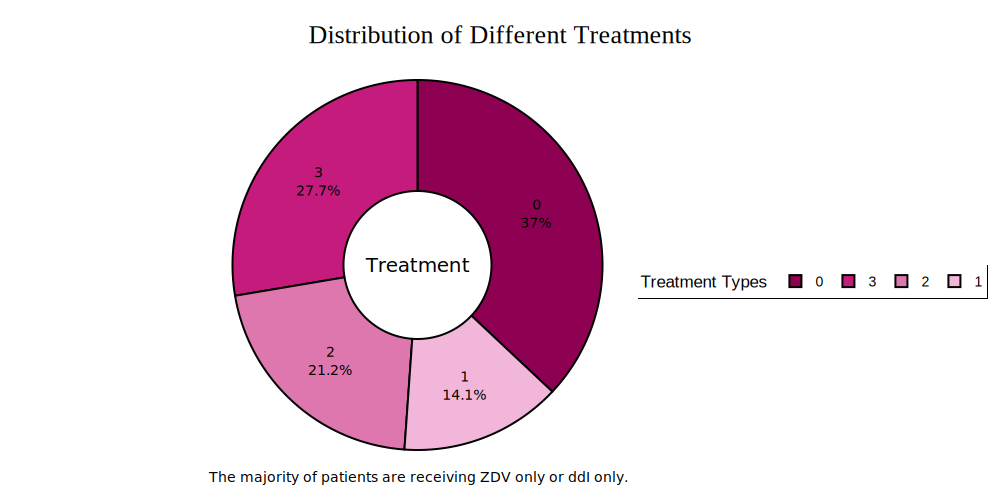

In [7]:
trt = df['trt'].value_counts().reset_index()
trt.columns = ['trt', 'count']

# Choose a diverging palette
palette = cl.scales['11']['div']['PiYG']

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=trt['trt'],
    values=trt['count'],
    hole=.4,
    marker=dict(colors=palette, line=dict(color='#000000', width=2)),
    hoverinfo="label+percent+value",
    textinfo="label+percent",
    textfont=dict(size=14, color='#000000')  # Adjust text color
)])

# Update layout
fig.update_layout(
    title_text="Treatment Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000", 
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    annotations=[dict(text='Treatment', x=0.5, y=0.5, font_size=20, showarrow=False, font=dict(color="#000000"))],
    showlegend=True,
    legend_title_text='Treatment Types',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Arial",
            size=14,
            color="#000000"  
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000",  
        borderwidth=0.5,
        orientation="h"  
    )
)

# Increase the width of the page
fig.update_layout(width=1000)

# Adding a more vibrant title and better spacing
fig.update_layout(
    title={
        'text': "Distribution of Different Treatments",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Add observation/interpretation
fig.add_annotation(
    text="The majority of patients are receiving ZDV only or ddI only.",
    x=0.5,
    y=-0.1,
    showarrow=False,
    font=dict(color="#000000", size=14)  # Adjust text color
)

# Show the pie chart
fig.show('svg')

----------------------------------------------------------------------------------------------------------------------------------------------------------


## Age


***Conclusions***

- *It can be seen that age is normally distributed*

- *There are no missing values*

- *Max values goes up to 68 but some outliers are present in the data*

- *mean and median are about the same hence we can conclude that the outliers are not affecting the data*

In [8]:
df['age'].describe()

count    15000.000000
mean        34.273800
std          7.074134
min         12.000000
25%         29.000000
50%         34.000000
75%         39.000000
max         68.000000
Name: age, dtype: float64

*Median and mean are around the same hence it seems like the distribution is normal.*

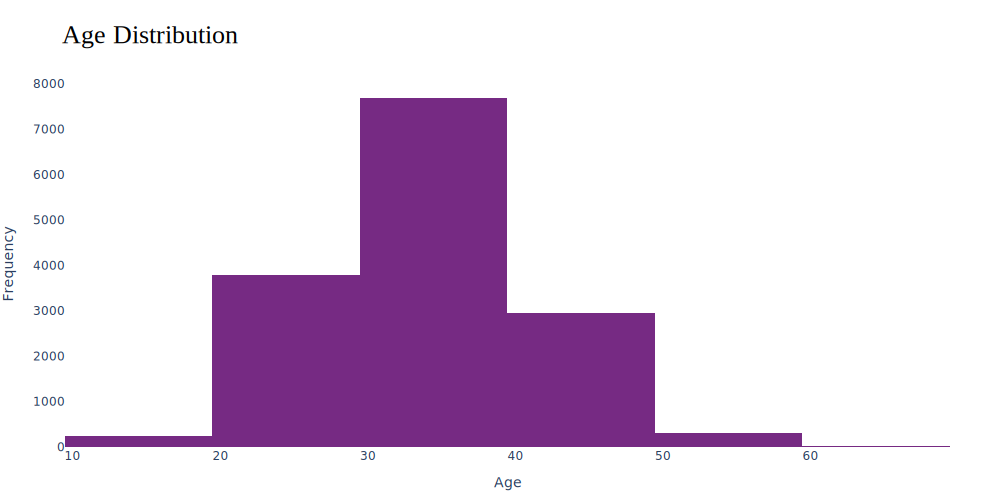

In [9]:
palette = cl.to_rgb(cl.scales['10']['div']['PRGn'])

# Create the histogram
fig = go.Figure(data=[go.Histogram(
    x=df['age'],
    marker=dict(color=palette[1]),  
    nbinsx=10
)])

fig.update_layout(
    title_text="Age Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Age"),
    yaxis=dict(title="Frequency"),
)

fig.update_layout(
    title={
        'text': "Age Distribution",
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.update_layout(width=1000)

# Show the pie chart
fig.show('svg')

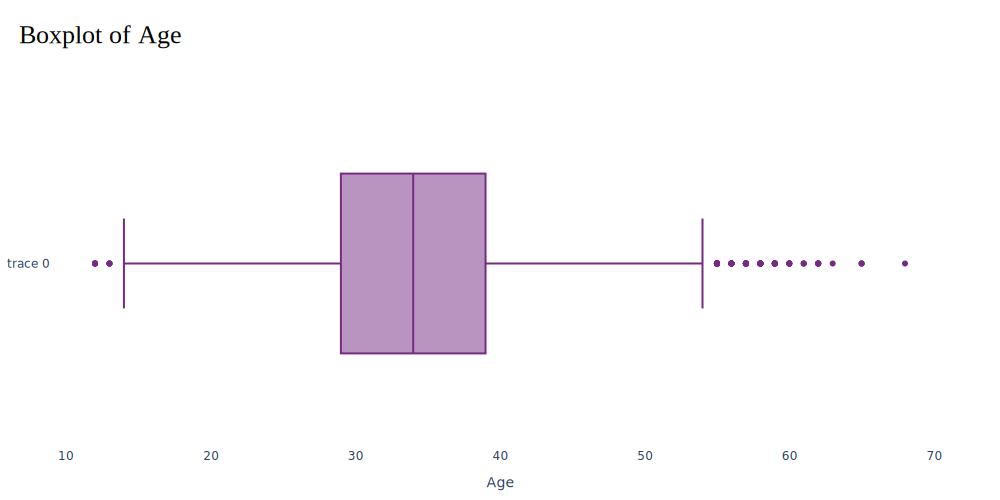

In [10]:
fig = go.Figure(data=[go.Box(
    x=df['age'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of Age",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Age"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.10,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show('svg')

*Some outliers are present after 54*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## wtkg : Weight (in Kgs)

***Conclusions***
- *Most of the outliers are present beyond the weight of 100kg*

- *The distribution is slightly positively skewewd*

- "No missing values"

***Hypothesis***

- *As most of the outliers in the Age column are present beyond the age of 60, hence maybe most of the people belonging to that age group are over 100 kg*

In [11]:
df['wtkg'].describe()

count    15000.000000
mean        76.019604
std         12.170759
min         42.256390
25%         68.323125
50%         74.114225
75%         81.309035
max        141.612390
Name: wtkg, dtype: float64

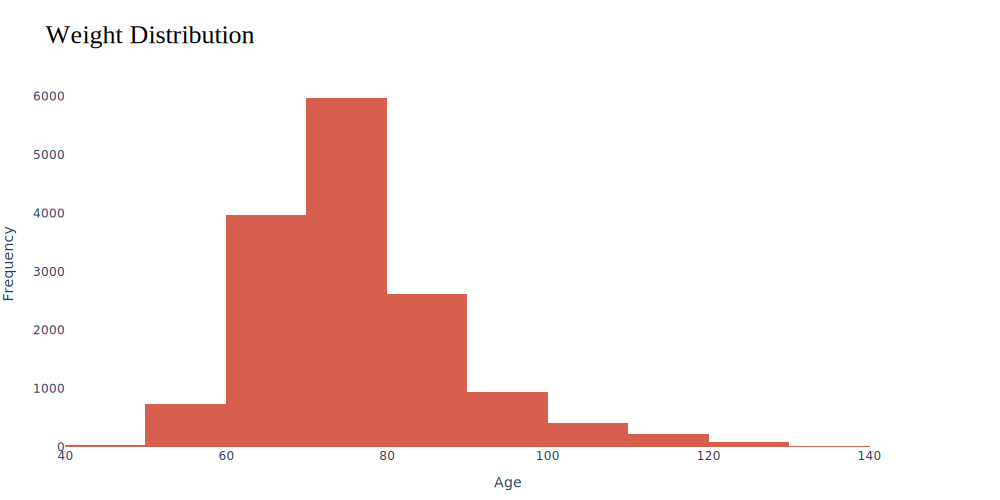

In [12]:
palette = cl.to_rgb(cl.scales['10']['div']['RdGy'])

# Create the histogram
fig = go.Figure(data=[go.Histogram(
    x=df['wtkg'],
    marker=dict(color=palette[2]),  # Choose the first color from the palette
    nbinsx=10
)])

# Update layout for better appearance
fig.update_layout(
    title_text="Weight Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  # Adjust title font color for better visibility
    paper_bgcolor='#ffffff',  # Set the background color to a warm white shade (#faf0e6)
    plot_bgcolor='#ffffff',  # Make sure the plot area also has a consistent background
    xaxis=dict(title="Age"),
    yaxis=dict(title="Frequency"),
)

# Adding a more vibrant title and better spacing
fig.update_layout(
    title={
        'text': "Weight Distribution",
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.update_layout(width=1000)

# Show the pie chart
fig.show('svg')

*Almost normally distributed. Slightly positively skewed*

In [13]:
df['wtkg'].skew()

1.1910895370485162

*Close to 1*

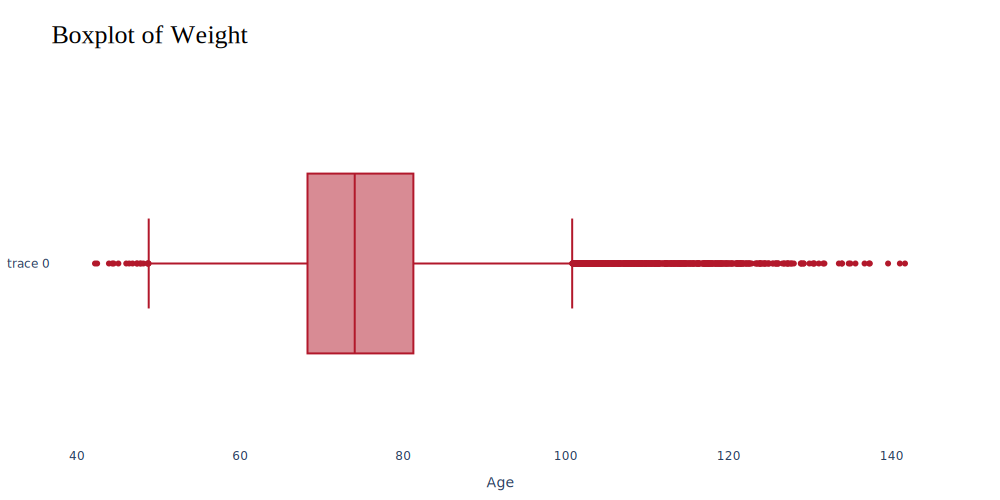

In [14]:
fig = go.Figure(data=[go.Box(
    x=df['wtkg'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of Weight",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Age"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show('svg')

*A great deal of outliers are present beyond 100*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## hemo : Hemophilia 
***About***

<div>
<p>
It refers to a genetic disorder characterized by the inability of the blood to clot normally. Individuals with hemophilia lack certain proteins, known as clotting factors, that are essential for blood clotting. As a result, they are at an increased risk of excessive bleeding, both internally and externally, even from minor injuries.

 </p>  
</div>


***Conclusions***
- *Majority of the patients do not have hemophilia*

In [15]:
df['hemo'].value_counts()

hemo
0    14520
1      480
Name: count, dtype: int64

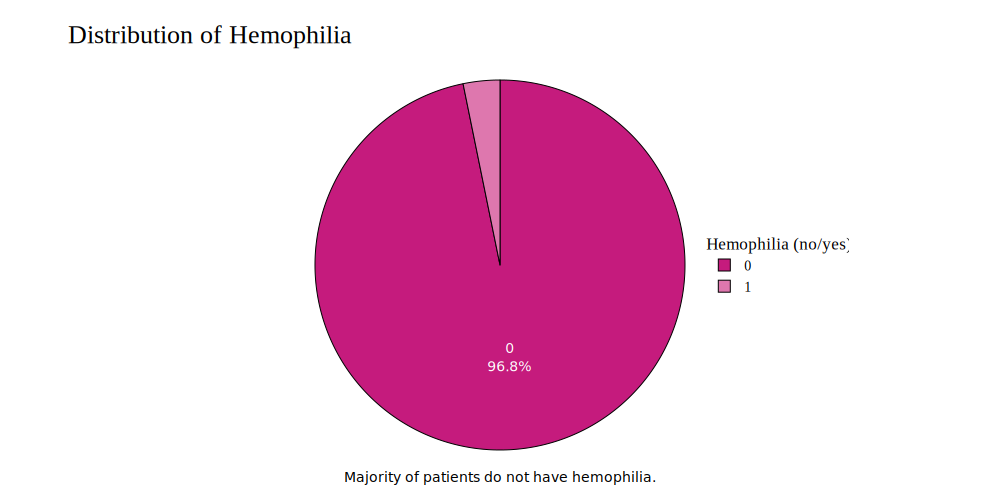

In [16]:
palette = cl.scales['9']['div']['PiYG']


hemo = df['hemo'].value_counts().reset_index()
hemo.columns = ['hemo', 'count']

fig = go.Figure(data=[go.Pie(
    labels=hemo['hemo'],
    values=hemo['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Hemophilia Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Hemophilia (no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.3,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of Hemophilia",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients do not have hemophilia.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------

## homo : Homosexual Activity 
***About***

<div>
<p>
Homosexual activity refers to sexual activity between individuals of the same sex, often between men. Historically, homosexual activity has been associated with a higher risk of HIV transmission due to various factor.
 </p>  
</div>


***Conclusions***
- *Majority of the patients have indulged in homosexual activity*

In [17]:
df['homo'].value_counts()

homo
1    9791
0    5209
Name: count, dtype: int64

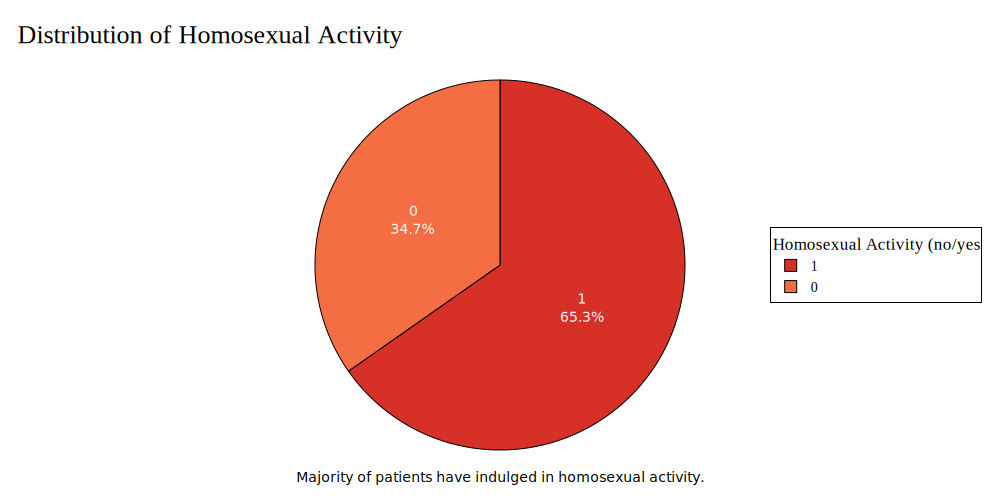

In [18]:
palette = cl.scales['9']['div']['RdYlBu']


homo = df['homo'].value_counts().reset_index()
homo.columns = ['homo', 'count']

fig = go.Figure(data=[go.Pie(
    labels=homo['homo'],
    values=homo['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of Homosexual Activity",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Homosexual Activity (no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of Homosexual Activity",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients have indulged in homosexual activity.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------


## drugs :  history of intravenous (IV) drug use  

***Conclusions***
- *Majority of the patients do not have a history of drug use*

In [19]:
df['drugs'].value_counts()

drugs
0    13082
1     1918
Name: count, dtype: int64

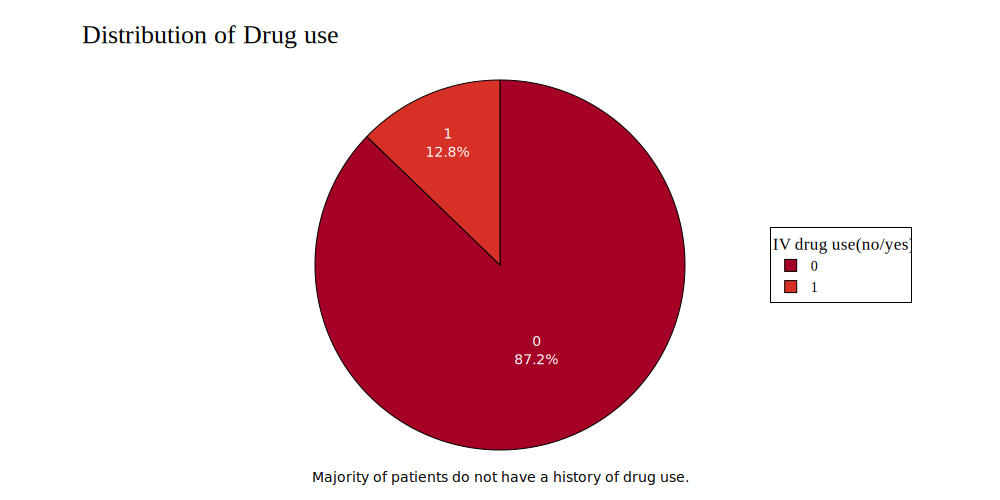

In [20]:
palette = cl.scales['11']['div']['RdYlGn']


drug = df['drugs'].value_counts().reset_index()
drug.columns = ['drugs', 'count']

fig = go.Figure(data=[go.Pie(
    labels=drug['drugs'],
    values=drug['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of Drug Use",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='IV drug use(no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of Drug use",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients do not have a history of drug use.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------

## karnof: Karnofsky score (on a scale of 0-100)

***About***
<div>
    <p>
The Karnofsky Performance Status (KPS) is a widely used measure of functional status and overall well-being in patients with various medical conditions, including AIDS  
    In the context of AIDS, the Karnofsky score is particularly relevant for evaluating the impact of the disease on a patient's functional status and determining appropriate treatment and supportive care interventions. The score is typically assessed through a brief clinical evaluation and is based on the patient's ability to perform activities such as self-care, ambulation, and work.

The Karnofsky score ranges from 0 to 100, with higher scores indicating better functional status and overall well-being. </p>
        <ul>
            <li>
                100: Normal, no evidence of disease, able to carry on normal activities without any restrictions.
            </li>
            <li>
                90: Able to carry on normal activities with minimal signs or symptoms of disease.
            </li>
            <li>
                80: Normal activities with some signs or symptoms of disease, but generally able to care for oneself.
            </li>
            <li>
                70: Cares for self but unable to carry on normal activities or to do active work.
            </li>
            <li>
                60: Requires occasional assistance, but is able to care for most personal needs.
            </li>
            <li>
                50: Requires considerable assistance and frequent medical care.
            </li>
            <li>
                40: Disabled, requires special care and assistance.
            </li>
            <li>
                30: Severely disabled, hospitalization is indicated, although death is not imminent.
            </li>
            <li>
                20: Very sick, hospitalization necessary, active supportive treatment necessary.
            </li>
            <li>
                10: Moribund, fatal processes progressing rapidly.
            </li>
            <li>
                0: Dead.
            </li>
        </ul>
</div>


***Conclusions***

- *The distribution is negatively skewed as most of the patients have karnfosky score of 100 which is a good sign*

In [21]:
df['karnof'].value_counts().sort_values(ascending = False)

karnof
100    10512
90      4106
80       117
81       103
82        60
79        60
83        18
91        15
78         8
77         1
Name: count, dtype: int64

*Most of the people have the karnofsky score of 100*

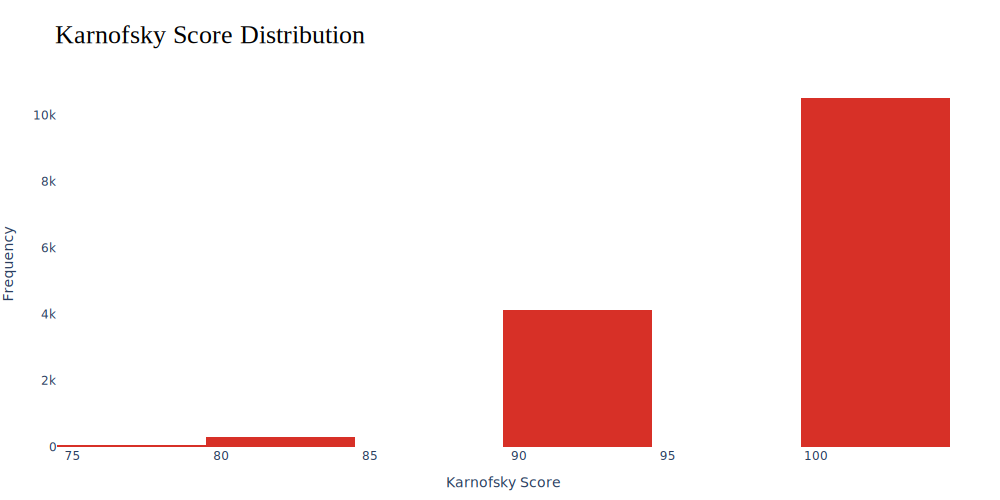

In [22]:
fig = go.Figure(data=[go.Histogram(
    x=df['karnof'],
    marker=dict(color=palette[1]),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Karnofsky Score Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Karnofsky Score"),
    yaxis=dict(title="Frequency"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Karnofsky Score Distribution",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

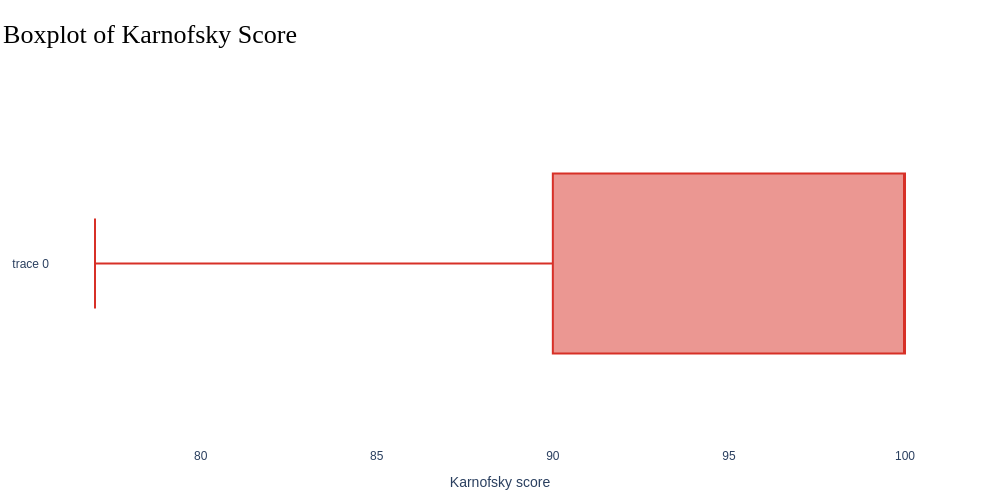

In [23]:
fig = go.Figure(data=[go.Box(
    x=df['karnof'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of Karnofsky Score",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Karnofsky score"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show('png')

In [24]:
df['karnof'].skew()

-1.243294303843015

*negatively skewed data*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## oprior: Non-ZDV antiretroviral therapy pre-175 

***About***

<div>
    <p>
        Antiretroviral therapy (ART) is a critical component of managing HIV infection, and non-ZDV therapies refer to antiretroviral medications other than Zidovudine. Monitoring the administration of such therapies in the context of AIDS infection datasets helps researchers understand the impact of different treatment regimens on disease progression, patient outcomes, and overall healthcare management strategies.
        </p>
    <br>
    <p>
        "oprior"  represents whether non-ZDV (Zidovudine) antiretroviral therapy was administered prior to 175 weeks (approximately 3.3 years) of observation. The values "0" typically indicate "no" or absence of the treatment, while "1" signifies "yes" or presence of the treatment.
       </p>
   
   </div>
   
***Conclusion***

- *Majority of the patients were not administered the antiretroviral therapy*

In [25]:
df['oprior'].value_counts()

oprior
0    14384
1      616
Name: count, dtype: int64

*antiretroviral therapy was `not` administered in majority of the patients*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## z30: ZDV in the 30 days prior to 175

***About***

<div>
    <p>
       The variable "z30" refers to whether Zidovudine (ZDV), an antiretroviral medication, was administered in the 30 days prior to the 175-week mark of observation. 
        </p>
    <br>
    <p>
        Zidovudine, also known as AZT, was one of the first drugs used to treat HIV and remains an important component of antiretroviral therapy. By examining the "z30" variable, researchers can assess the short-term use of ZDV leading up to the 175-week mark and its potential impact on patient outcomes. 
       </p>
   
   </div>
   
***Conclusion***

- *No evident high correlation*
- *Most of the patients were administered the drug*

In [26]:
df['z30'].value_counts()

z30
1    9688
0    5312
Name: count, dtype: int64

In [27]:
df.corr()['z30']*100


time         -8.618930
trt           2.173557
age          13.073698
wtkg         -8.469138
hemo          6.097358
homo          0.272864
drugs        -3.663879
karnof      -12.277447
oprior        5.348880
z30         100.000000
preanti      42.378861
race         -9.860449
gender       -1.681352
str2         60.919072
strat        57.333837
symptom       1.727802
treat         3.788999
offtrt       -0.473082
cd40        -20.962515
cd420       -28.923362
cd80         -2.207320
cd820         0.621898
infected     23.716859
Name: z30, dtype: float64

*z30 doesn't seem to have a high correlation with most of the variables. `str2 :antiretroviral history ` and z30 are slightly correlated* 

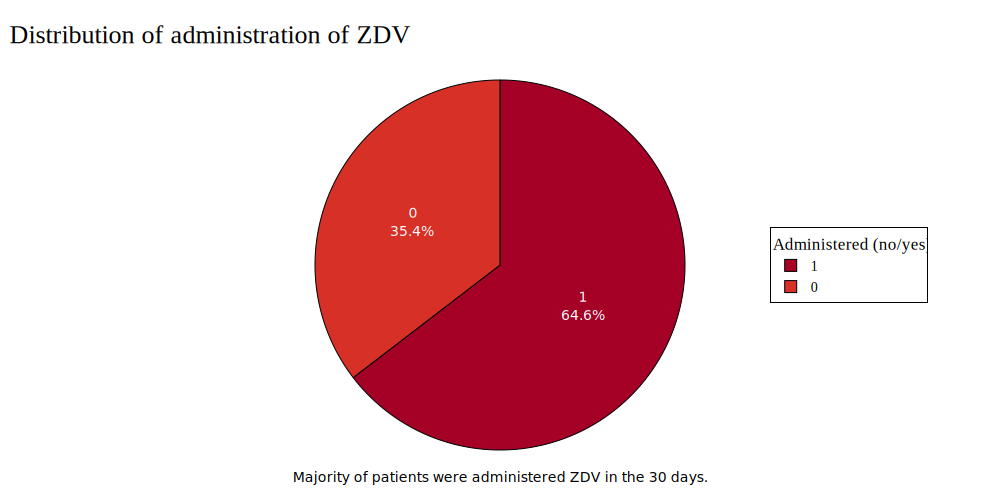

In [28]:

palette = cl.scales['11']['div']['RdYlGn']


z30 = df['z30'].value_counts().reset_index()
z30.columns = ['z30', 'count']

fig = go.Figure(data=[go.Pie(
    labels=z30['z30'],
    values=z30['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of administration of ZDV",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Administered (no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of administration of ZDV",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients were administered ZDV in the 30 days.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------

## preanti: days pre-175 anti-retroviral therapy

***About***

<div>
    <p>
preanti means the number of days or the duration (in days, weeks, or another time unit) that a patient has been on anti-retroviral therapy before reaching the 175-week mark since the start of observation or treatment.       
    
   </p>
 </div>
   
***Conclusion***

- *Mean is high as compared to the meadian, there are outliers present.*

- *Standard deviation is high. A standard deviation of 400 days indicates that the durations of ART among patients vary widely around the mean. This means that some patients may have had very short durations of therapy, while others had very long durations, relative to the average.*


In [29]:
df['preanti'].describe()

count    15000.000000
mean       315.619067
std        400.272034
min          0.000000
25%          0.000000
50%        124.000000
75%        495.000000
max       2851.000000
Name: preanti, dtype: float64

*There is a huge distinction between the mean and median. There is possibly some amount of skewness in the data*

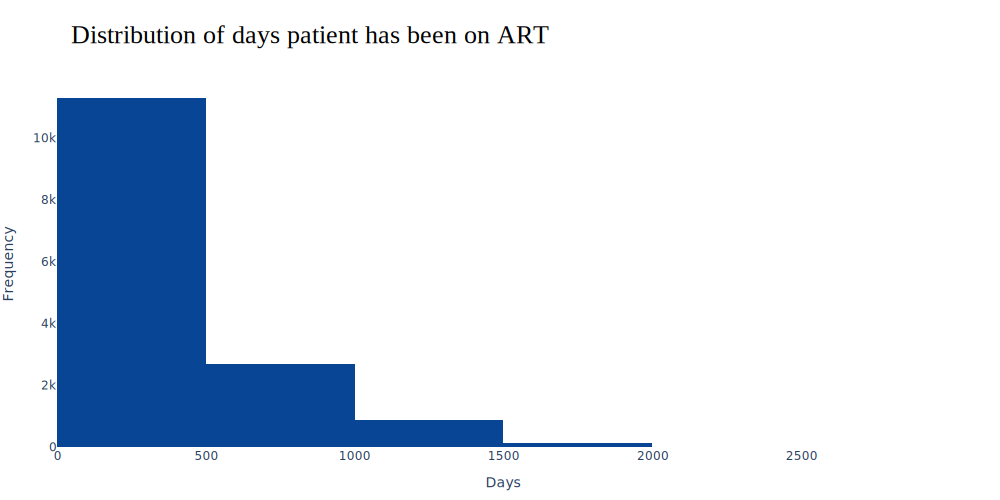

In [30]:
palette = cl.scales['8']['seq']['Blues']

fig = go.Figure(data=[go.Histogram(
    x=df['preanti'],
    marker=dict(color=palette[7]),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Distribution of days patient has been on ART",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Days"),
    yaxis=dict(title="Frequency"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Distribution of days patient has been on ART",
        'y':0.95,
        'x':0.31,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

*highly positively skewed distribution*

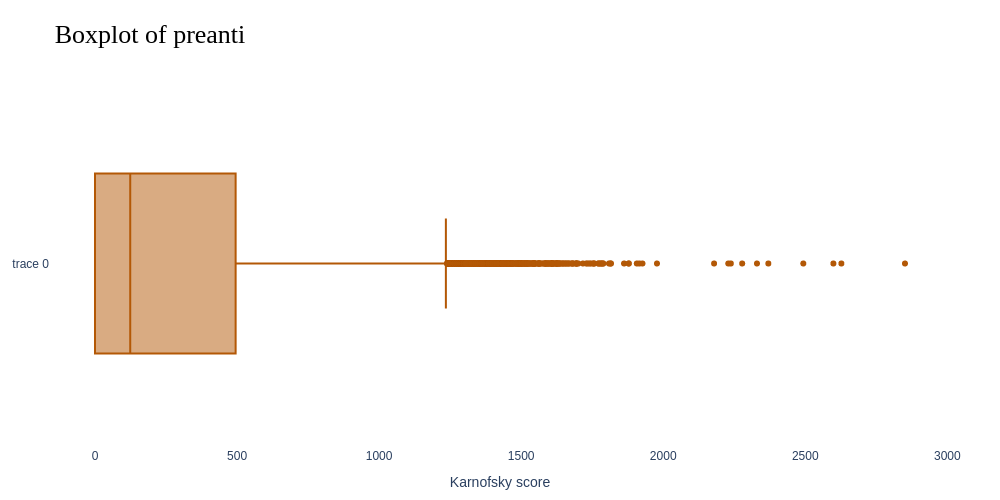

In [31]:

palette = cl.scales['11']['div']['PuOr']
fig = go.Figure(data=[go.Box(
    x=df['preanti'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of preanti",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Karnofsky score"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show('png')

*Most outliers are present after 1235 days. This means some patients were administered ART for more than 1235 days before the 175 week mark*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## Race

***Conclusions***
- *Majority of the patients are white*

- *There is no strong correlation of race with any other variable*

In [32]:
df['race'].value_counts()

race
0    10486
1     4514
Name: count, dtype: int64

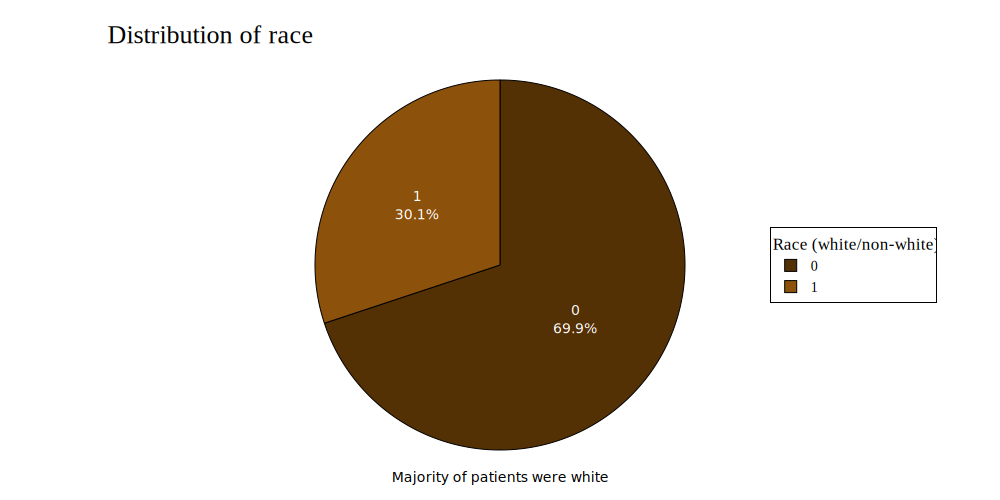

In [33]:

palette = cl.scales['10']['div']['BrBG']


race = df['race'].value_counts().reset_index()
race.columns = ['race', 'count']

fig = go.Figure(data=[go.Pie(
    labels=race['race'],
    values=race['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of race",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Race (white/non-white)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of race",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients were white",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


In [34]:
df.corr()['race']*100

time         -3.077521
trt          -5.806935
age          -6.831852
wtkg         -5.133001
hemo          0.458512
homo        -20.193154
drugs         4.692483
karnof        4.353950
oprior       -2.810755
z30          -9.860449
preanti     -10.257438
race        100.000000
gender      -14.030872
str2        -12.520895
strat       -14.411401
symptom      -0.458382
treat        -9.108906
offtrt        6.999763
cd40          3.988502
cd420         4.405390
cd80         -2.703265
cd820        -1.132044
infected     -3.606357
Name: race, dtype: float64

----------------------------------------------------------------------------------------------------------------------------------------------------------

## Gender

***Conclusions***

- *Majority of the patients are male*

- *There is no strong correlation of gender with any other variable*

In [35]:
df['gender'].value_counts()

gender
1    12807
0     2193
Name: count, dtype: int64

In [36]:
df.corr()['gender']*100

time          4.146380
trt           5.685414
age           5.749563
wtkg          7.097579
hemo         -2.875861
homo         20.507894
drugs        -3.367042
karnof        0.841962
oprior        0.766320
z30          -1.681352
preanti       0.164133
race        -14.030872
gender      100.000000
str2         -0.673710
strat         0.768461
symptom       0.722118
treat         5.650087
offtrt       -8.396814
cd40          2.395995
cd420         1.205226
cd80          1.975016
cd820         1.111495
infected     -2.121825
Name: gender, dtype: float64

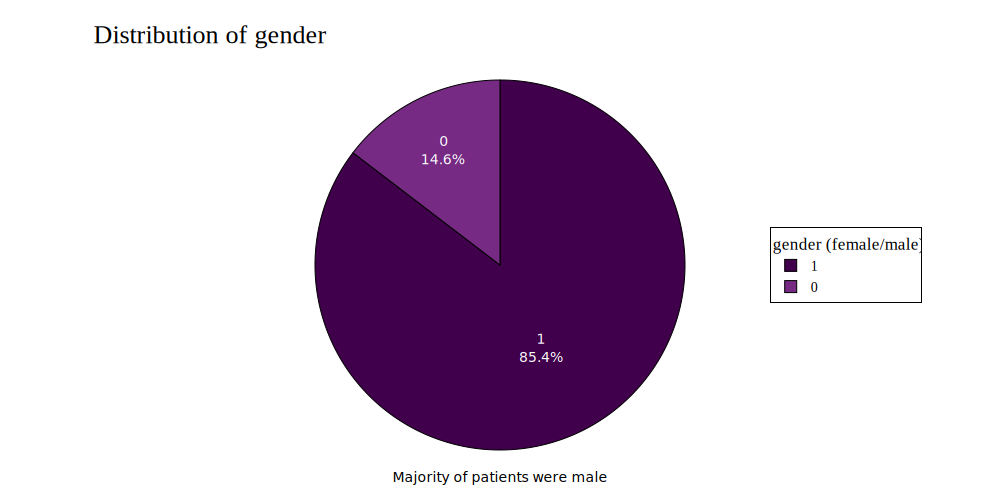

In [37]:

palette = cl.scales['11']['div']['PRGn']


gen = df['gender'].value_counts().reset_index()
gen.columns = ['gender', 'count']

fig = go.Figure(data=[go.Pie(
    labels=gen['gender'],
    values=gen['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of gender",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='gender (female/male)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of gender",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients were male",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------


## str2: antiretroviral history (0=naive, 1=experienced)

***About***
<div>
    <p>
        The variable str2 represents the antiretroviral history of individuals, specifically whether they are "naive" or "experienced" with antiretroviral therapy (ART).
    </p>
    <ul>
        <li>Naive (0):
            <ul>
                <li>Individuals categorized as "naive" have not previously received antiretroviral therapy. They are newly diagnosed or have not yet started treatment for HIV/AIDS. This group typically includes individuals who have recently tested positive for HIV or have delayed initiating treatment for various reasons.</li>
            </ul>
        </li>
        <li>Experienced (1):
            <ul>
                <li>Individuals categorized as "experienced" have a history of receiving antiretroviral therapy. They have previously been treated for HIV/AIDS with antiretroviral medications. This group may include individuals who have undergone treatment for a certain duration, stopped treatment, and then resumed therapy, as well as those who have been consistently on ART for an extended period.</li>
            </ul>
        </li>
     
   </ul>
</div>


***Conclusions***

- *Majority of patients were experienced and were previously treated with ART medication*

In [38]:
df['str2'].value_counts()

str2
1    8655
0    6345
Name: count, dtype: int64

In [39]:
df.corr()['str2']*100

time         -7.573001
trt           1.465054
age          12.960868
wtkg         -9.006936
hemo          6.290188
homo          3.021203
drugs        -3.139231
karnof      -13.153909
oprior        6.294665
z30          60.919072
preanti      45.505698
race        -12.520895
gender       -0.673710
str2        100.000000
strat        61.222869
symptom       3.570729
treat         3.934434
offtrt       -0.732320
cd40        -23.915651
cd420       -31.087622
cd80         -2.578902
cd820         0.989379
infected     23.336492
Name: str2, dtype: float64

*Moderately correlated with z30 and strat* 

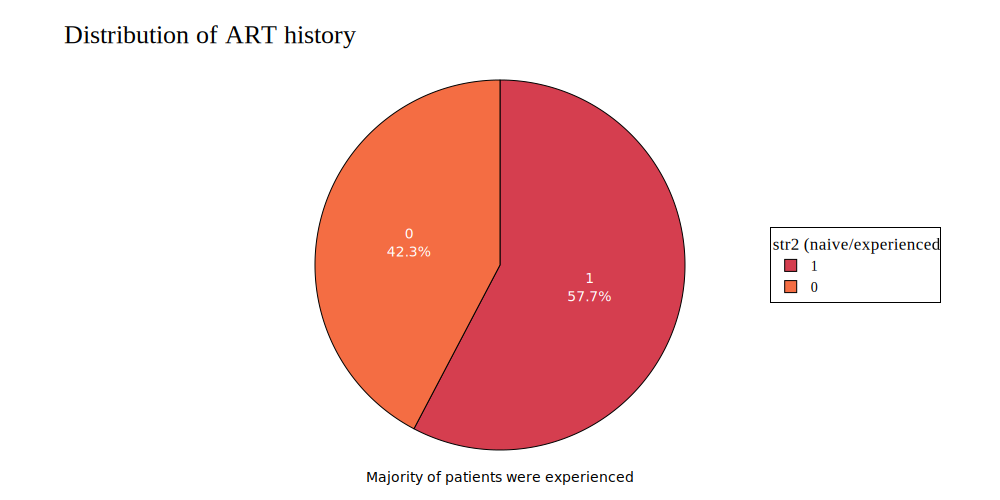

In [40]:

palette = cl.scales['9']['div']['Spectral']


str2 = df['str2'].value_counts().reset_index()
str2.columns = ['str2', 'count']

fig = go.Figure(data=[go.Pie(
    labels=str2['str2'],
    values=str2['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of ART history",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='str2 (naive/experienced)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of ART history",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients were experienced",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------


## symptom: symptomatic indicator (0=asymp, 1=symp)

<div>
     <ul>
        <li>Asymptomatic (0):
            <ul>
                <li>Individuals categorized as "asymp" (asymptomatic) have no noticeable symptoms associated with HIV/AIDS at the time of assessment. They may be carriers of the virus but have not yet developed symptoms or clinical manifestations of the disease. Asymptomatic individuals may still be infectious and capable of transmitting the virus to others.</li>
            </ul>
        </li>
        <li>Symptomatic (1):
            <ul>
                <li>Individuals categorized as "symp" (symptomatic) exhibit symptoms or clinical manifestations of HIV/AIDS at the time of assessment. These symptoms may include but are not limited to fever, fatigue, weight loss, night sweats, swollen lymph nodes, opportunistic infections, and other AIDS-defining illnesses. Symptomatic individuals typically require medical evaluation, treatment, and management of HIV/AIDS-related complications.</li>
            </ul>
        </li>
     
   </ul>
    </div>
    
***Conclusion***

- *Most of the patients had no signs of any symptom*
    

In [41]:
df['symptom'].value_counts()

symptom
0    13681
1     1319
Name: count, dtype: int64

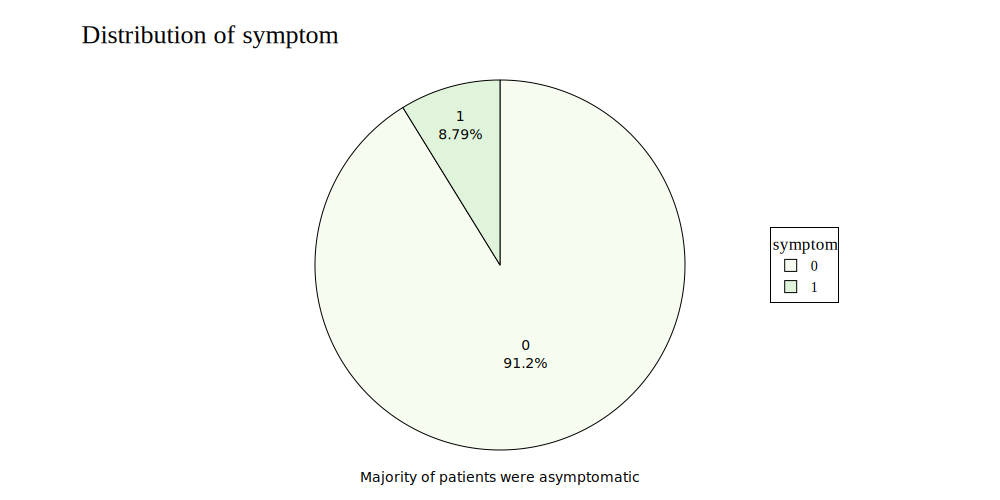

In [42]:

palette = cl.scales['8']['seq']['GnBu']


sym = df['symptom'].value_counts().reset_index()
sym.columns = ['symptom', 'count']

fig = go.Figure(data=[go.Pie(
    labels=sym['symptom'],
    values=sym['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#000000')
)])


fig.update_layout(
    title_text="Distribution of Symptom",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='symptom',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of symptom",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients were asymptomatic",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


In [43]:
df.corr()['symptom']*100

time         -2.156535
trt          -2.005299
age           0.059428
wtkg         -0.288660
hemo         -0.964097
homo          1.782219
drugs         0.447201
karnof        0.382483
oprior        2.945846
z30           1.727802
preanti       2.199479
race         -0.458382
gender        0.722118
str2          3.570729
strat         1.967243
symptom     100.000000
treat        -3.062186
offtrt       -0.299683
cd40         -2.154229
cd420        -3.933053
cd80          1.023918
cd820         1.350573
infected      3.301034
Name: symptom, dtype: float64

----------------------------------------------------------------------------------------------------------------------------------------------------------


## treat: treatment indicator (0=ZDV only, 1=others)

***Conclusion***

- *Patients opted for treatments other than just ZDV*

In [44]:
df.corr()['treat']*100

time          6.817768
trt          23.178605
age           4.570299
wtkg         -0.093578
hemo          0.217342
homo          8.037881
drugs        -2.601572
karnof       -6.687859
oprior       -1.419959
z30           3.788999
preanti       3.101474
race         -9.108906
gender        5.650087
str2          3.934434
strat         3.078169
symptom      -3.062186
treat       100.000000
offtrt       -5.011457
cd40         -1.921836
cd420         2.107671
cd80          0.811203
cd820         3.362233
infected     -3.644487
Name: treat, dtype: float64

In [45]:
df['treat'].value_counts()

treat
1    11046
0     3954
Name: count, dtype: int64

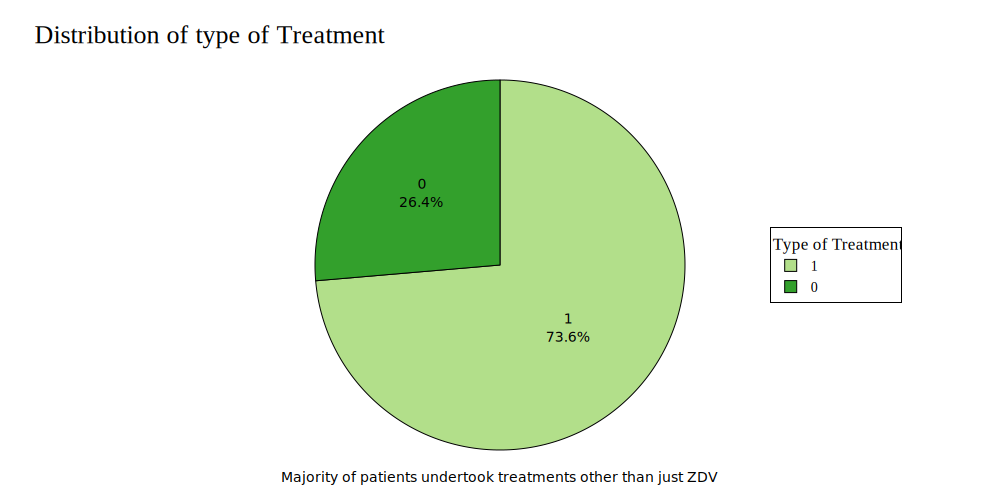

In [46]:

palette = cl.scales['7']['qual']['Paired'][2:4]


treat = df['treat'].value_counts().reset_index()
treat.columns = ['treat', 'count']

fig = go.Figure(data=[go.Pie(
    labels=treat['treat'],
    values=treat['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#000000')
)])


fig.update_layout(
    title_text="Distribution of type of Treatments",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Type of Treatment',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of type of Treatment",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients undertook treatments other than just ZDV ",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------


## offtrt: indicator of off-trt before 96+/-5 weeks (0=no,1=yes)


The variable "offtrt"  represents an indicator of being off treatment before a specified time frame, typically 96 weeks (approximately 2 years) with a margin of 5 weeks. 
    
- Indicator of Off-Treatment (0=no):
   - Individuals categorized as "0" for "offtrt" are not considered to have been off treatment before the specified time frame (96+/-5 weeks). This means they either remained on treatment continuously during this period or did not have any interruption in their treatment regimen that exceeded the defined threshold.
         
- Indicator of Off-Treatment (1=yes):   
  - Individuals categorized as "1" for "offtrt" are considered to have been off treatment before the specified time frame (96+/-5 weeks). This indicates that at some point during the period leading up to 96 weeks, they experienced an interruption or cessation in their treatment regimen, whether intentional or unintentional, that lasted beyond the defined threshold.


***Conclusion***
- *Majority of patients have successfully maintained their antiretroviral therapy without significant interruptions over the specified period.*

In [47]:
df['offtrt'].value_counts()

offtrt
0    9768
1    5232
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------------------------------------------------------------


# cd40: CD4 at baseline

CD4 cells, also known as CD4+ T cells, are a type of white blood cell that plays a crucial role in the immune system. They help coordinate the immune response by signaling other cells in the immune system to perform their functions.

People living with HIV who have a CD4 count over 500 are usually in pretty good health. People living with HIV who have a CD4 cell count below 200 are at high risk of developing serious illnesses. HIV treatment is recommended for all people living with HIV. It is especially important for people with low CD4 counts.

***Conclusion***
- *Most of the patients have a count closer to 300 which is a bit concerning*

In [48]:
df['cd40'].describe()

count    15000.000000
mean       318.754800
std        102.653183
min          0.000000
25%        235.000000
50%        298.000000
75%        396.000000
max        996.000000
Name: cd40, dtype: float64

*Median is 298. A CD4 count of 298 cells/mm³ indicates that the median immune system health of individuals in the study is moderately compromised.*

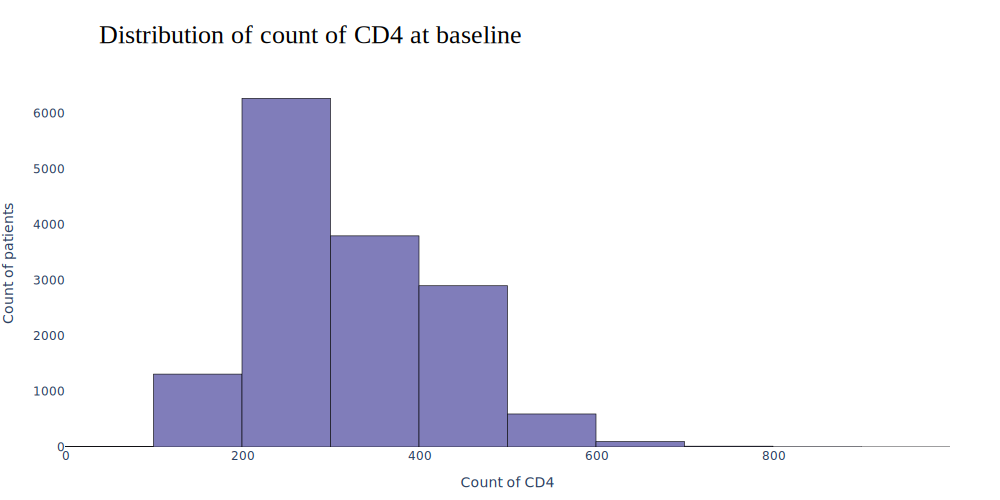

In [49]:
palette = cl.scales['9']['seq']['Purples']

fig = go.Figure(data=[go.Histogram(
    x=df['cd40'],
    marker=dict(color=palette[5], line=dict(color='#000000', width=0.6)),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Distribution of count of CD4",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Count of CD4"),
    yaxis=dict(title="Count of patients"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Distribution of count of CD4 at baseline",
        'y':0.95,
        'x':0.31,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

*Slightly positively correlated. 1500 people still have a low count(close to 200) of CD4*

----------------------------------------------------------------------------------------------------------------------------------------------------------


## cd420: CD4 at 20+/-5 weeks

The CD4 count at 20 weeks (with a margin of +/- 5 weeks) is used to monitor how the immune system is responding to antiretroviral therapy (ART) or to track the progression of the disease

An increase in CD4 count suggests that the treatment is working, leading to immune recovery. Conversely, a stable or decreasing CD4 count may signal the need to reassess the treatment regimen.

- *There is a shift to the right. This shows that the treatment is working*

In [50]:
df['cd420'].describe()

count    15000.000000
mean       436.178600
std        142.800481
min        111.000000
25%        327.000000
50%        413.000000
75%        527.000000
max       1119.000000
Name: cd420, dtype: float64

*The CD4 count has risen to 413 for half of the population which is a clear indicator of the fact that the therapy is working for at least half of the population*

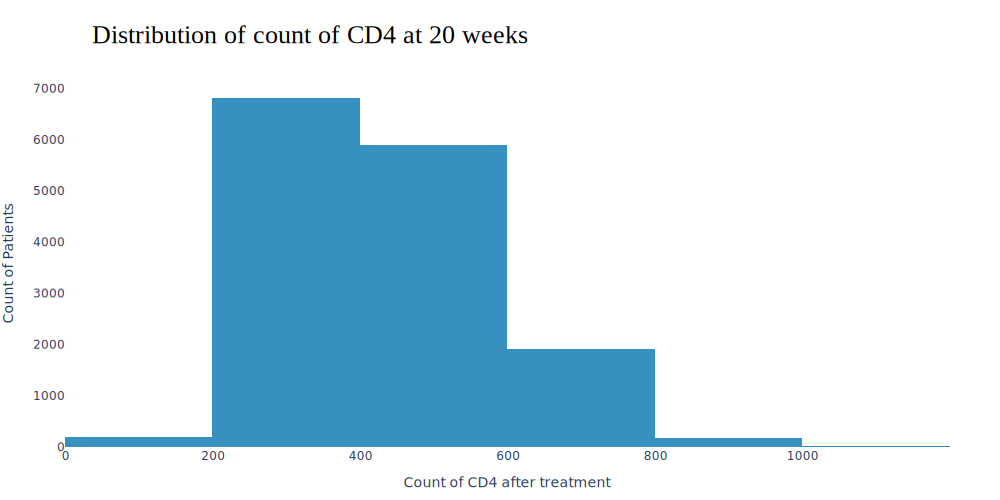

In [51]:
palette = cl.scales['9']['seq']['PuBu']

fig = go.Figure(data=[go.Histogram(
    x=df['cd420'],
    marker=dict(color=palette[5]),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Distribution of count of CD4",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Count of CD4 after treatment"),
    yaxis=dict(title="Count of Patients"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Distribution of count of CD4 at 20 weeks",
        'y':0.95,
        'x':0.31,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

*There is a slight shift towards the right. Now very few people have a low count of CD4*

----------------------------------------------------------------------------------------------------------------------------------------------------------


## cd80: CD8 at baseline

CD8 cells, also known as CD8+ T cells or cytotoxic T cells, are a type of white blood cell that plays a critical role in the immune system by directly killing infected cells, including those infected with viruses like HIV.

The CD8 count at baseline provides a snapshot of the patient's immune response at the time of initial measurement. In HIV-infected individuals, CD8+ T cells are crucial for controlling the infection by killing HIV-infected cells.

Typically, HIV infection leads to an increase in CD8+ T cells as the immune system attempts to fight the virus.

`The CD4/CD8 ratio is an important metric in HIV/AIDS. Normally, the ratio is greater than 1, meaning there are more CD4 cells than CD8 cells.  In HIV infection, this ratio often decreases due to the decline in CD4 cells and the increase in CD8 cells.`


***Conclusion***

- *Half of the population has a high count of CD8 cells which means that their immune system is quite active*

In [52]:
df['cd80'].describe()

count    15000.000000
mean      1049.644400
std        489.881489
min        273.000000
25%        716.000000
50%        887.000000
75%       1252.250000
max       4867.000000
Name: cd80, dtype: float64

*A median CD8 count of 887 suggests that many individuals in the study or clinical population have CD8 levels within or above the normal range, indicating an active immune response.*

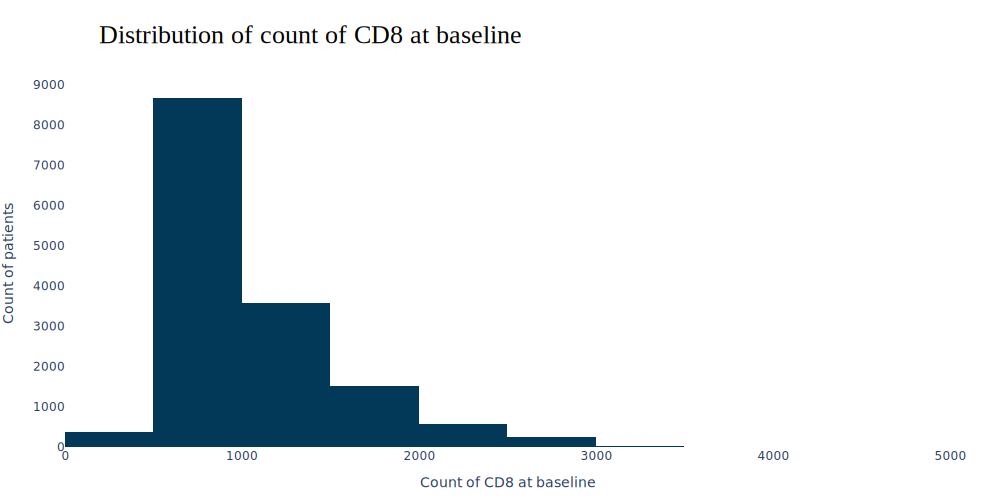

In [53]:
palette = cl.scales['9']['seq']['PuBu']

fig = go.Figure(data=[go.Histogram(
    x=df['cd80'],
    marker=dict(color=palette[8]),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Distribution of count of CD4",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Count of CD8 at baseline"),
    yaxis=dict(title="Count of patients"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Distribution of count of CD8 at baseline",
        'y':0.95,
        'x':0.31,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

*High positive skewness*

----------------------------------------------------------------------------------------------------------------------------------------------------------


## cd820: CD8 at 20+/-5 weeks

the variable "cd820" represents the CD8 count measured at approximately 20 weeks (with a margin of +/- 5 weeks) after a baseline or initial measurement.

The CD8 count at 20 weeks (with a margin of +/- 5 weeks) is used to monitor how the immune system is responding to antiretroviral therapy (ART) or to track the progression of the disease.

Changes in the CD8 count from baseline to around 20 weeks can indicate the effectiveness of ART. An increase or stable CD8 count might suggest that the immune system is responding well to treatment, whereas a decrease could indicate potential issues with the effectiveness of the treatment.

***Conclusion***

- *A decrease in CD8 count can indicate effective antiretroviral therapy (ART).*

In [54]:
df['cd820'].describe()

count    15000.000000
mean       908.306867
std        337.759073
min        143.000000
25%        652.000000
50%        858.000000
75%       1087.250000
max       3253.000000
Name: cd820, dtype: float64

*There is a decrease in the median and mean count as compared to the baseline count which is a good sign*

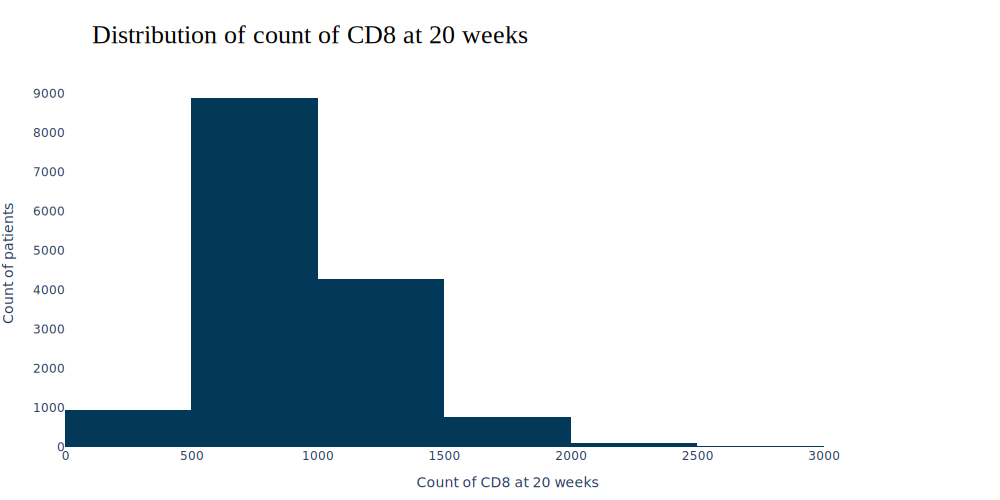

In [55]:
palette = cl.scales['9']['seq']['PuBu']

fig = go.Figure(data=[go.Histogram(
    x=df['cd820'],
    marker=dict(color=palette[8]),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Distribution of count of CD4",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Count of CD8 at 20 weeks"),
    yaxis=dict(title="Count of patients"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Distribution of count of CD8 at 20 weeks",
        'y':0.95,
        'x':0.31,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

*There is an increase in the width of the bar at 9000 patients which means that most of the patients experienced an increase in their count of CD8 cells*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## <div style="text-align: center"> <b>BIVARIATE ANALYSIS</b></div>

In [56]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0


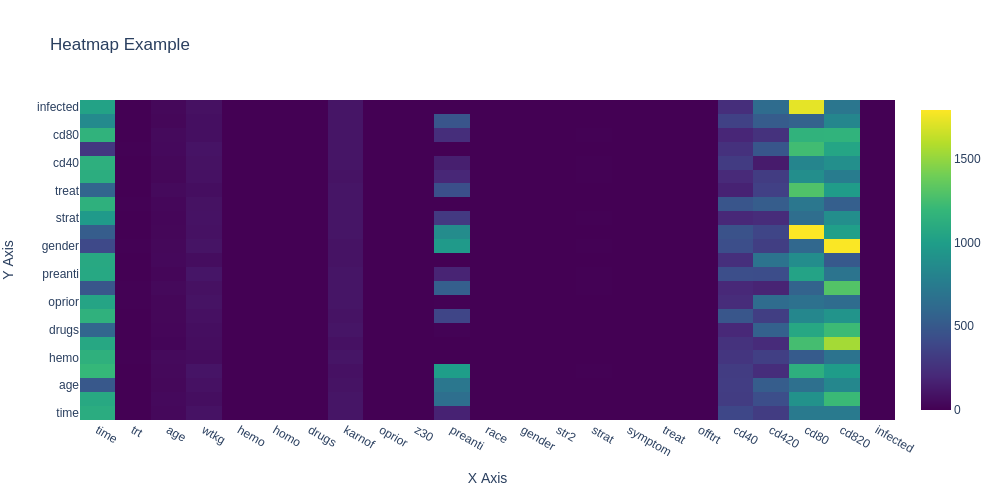

In [57]:
heatmap = go.Heatmap(
    z=df,
    x=df.columns,  # x-axis labels
    y=df.columns,  # y-axis labels
    colorscale='Viridis'      # colorscale
)

# Create the figure and add the heatmap
fig = go.Figure(data=[heatmap])

# Update layout for better visualization
fig.update_layout(
    title='Heatmap Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis'
)
fig.update_layout(width=1000)

# Display the heatmap
fig.show('png')